In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv("bestsellers with categories.csv")
print(df.shape)
print(df.columns)

(550, 7)
Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')


In [20]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


What is the reviews price aand user trainnig in years interm of Genre?
Are User Rating and Reviews have relations?
Does statistically price affect reviews?
is  there statistically different between Fiction and non fiction in terms of Reviews, User Rating,Price?
İs there are significantly change between year and reviews

In [21]:
df.shape

(550, 7)

In [22]:
df.isnull().any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

In [23]:
df.describe()


,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [47]:
df.loc[1]

Name           11/22/63: A Novel
Author              Stephen King
User Rating                  4.6
Reviews                     2052
Price                         22
Year                        2011
Genre                    Fiction
Name: 1, dtype: object

In [ ]:
def unique_value(df):
    for i in range(len(df.columns)):
        df[i].nunique()
        
    

<Axes: xlabel='Year', ylabel='Reviews'>

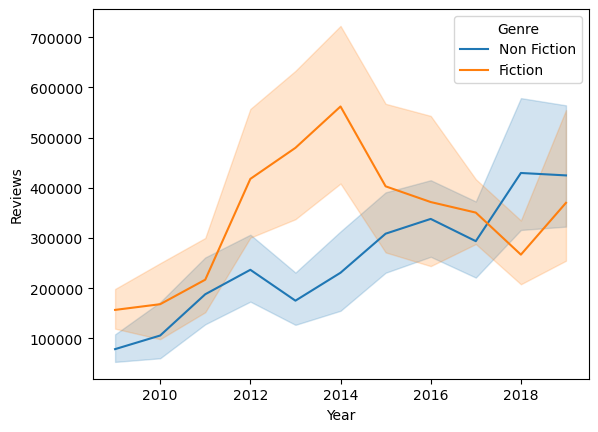

In [31]:

sns.lineplot(data=df,x="Year",y="Reviews",hue="Genre",estimator=np.sum)